## IMPORT LIBRARY

In [1]:
# 202331035_Nadila Kusuma Dewi
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Baca gambar asli 

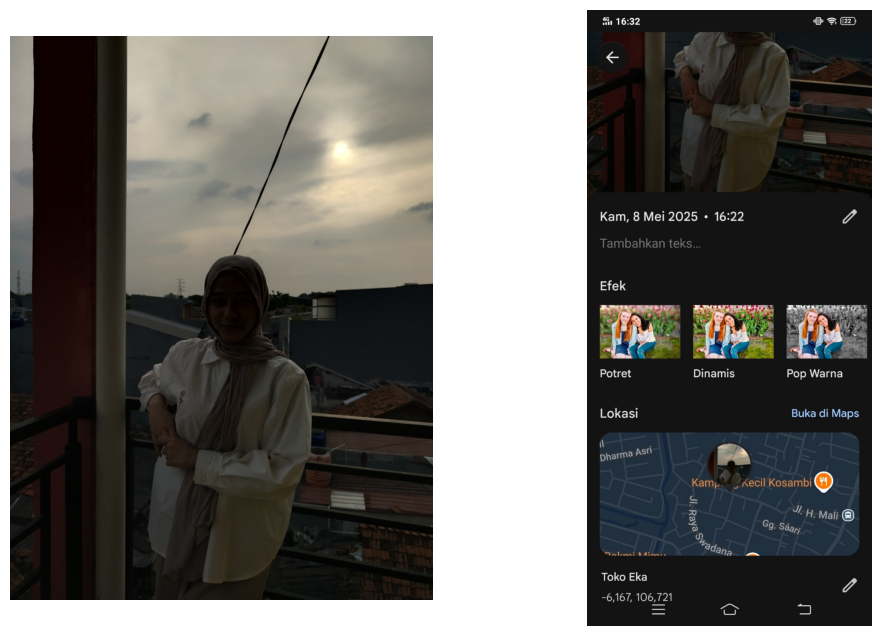

In [4]:
# 202331035_Nadila Kusuma Dewi
# Membaca gambar
img1 = cv2.imread('gambar2.jpg')
img2 = cv2.imread('info2.jpg')

# Mengonversi warna BGR ke RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Menampilkan gambar pertama
axs[0].imshow(img1_rgb)
axs[0].axis('off')

# Menampilkan gambar kedua
axs[1].imshow(img2_rgb)
axs[1].axis('off')

plt.show()

## KONVERSI KE GRAYSCALE

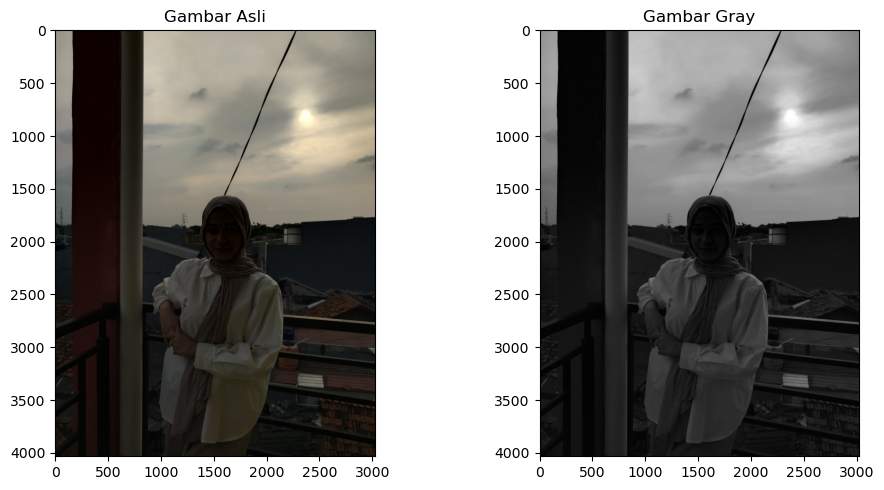

In [7]:
# 202331035_Nadila Kusuma Dewi
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar asli dan grayscale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gambar Gray')
plt.tight_layout()
plt.show()

## MACAM-MACAM METODE

In [10]:
# 202331035_Nadila Kusuma Dewi
# Metode 1: Histogram Equalization sederhana
equ = cv2.equalizeHist(gray)

# Metode 2: CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_clahe = clahe.apply(gray)

# Metode 3: Gamma correction
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_corrected = adjust_gamma(gray, gamma=1.5)  # Nilai gamma > 1 untuk meningkatkan brightness area gelap

In [12]:
# 202331035_Nadila Kusuma Dewi
# Metode 4: Blending hasil untuk mendapatkan hasil optimal
alpha = 0.7
beta = 0.3
blended = cv2.addWeighted(equ, alpha, enhanced_clahe, beta, 0)

## Tampilkan hasil semua metode perbaikan

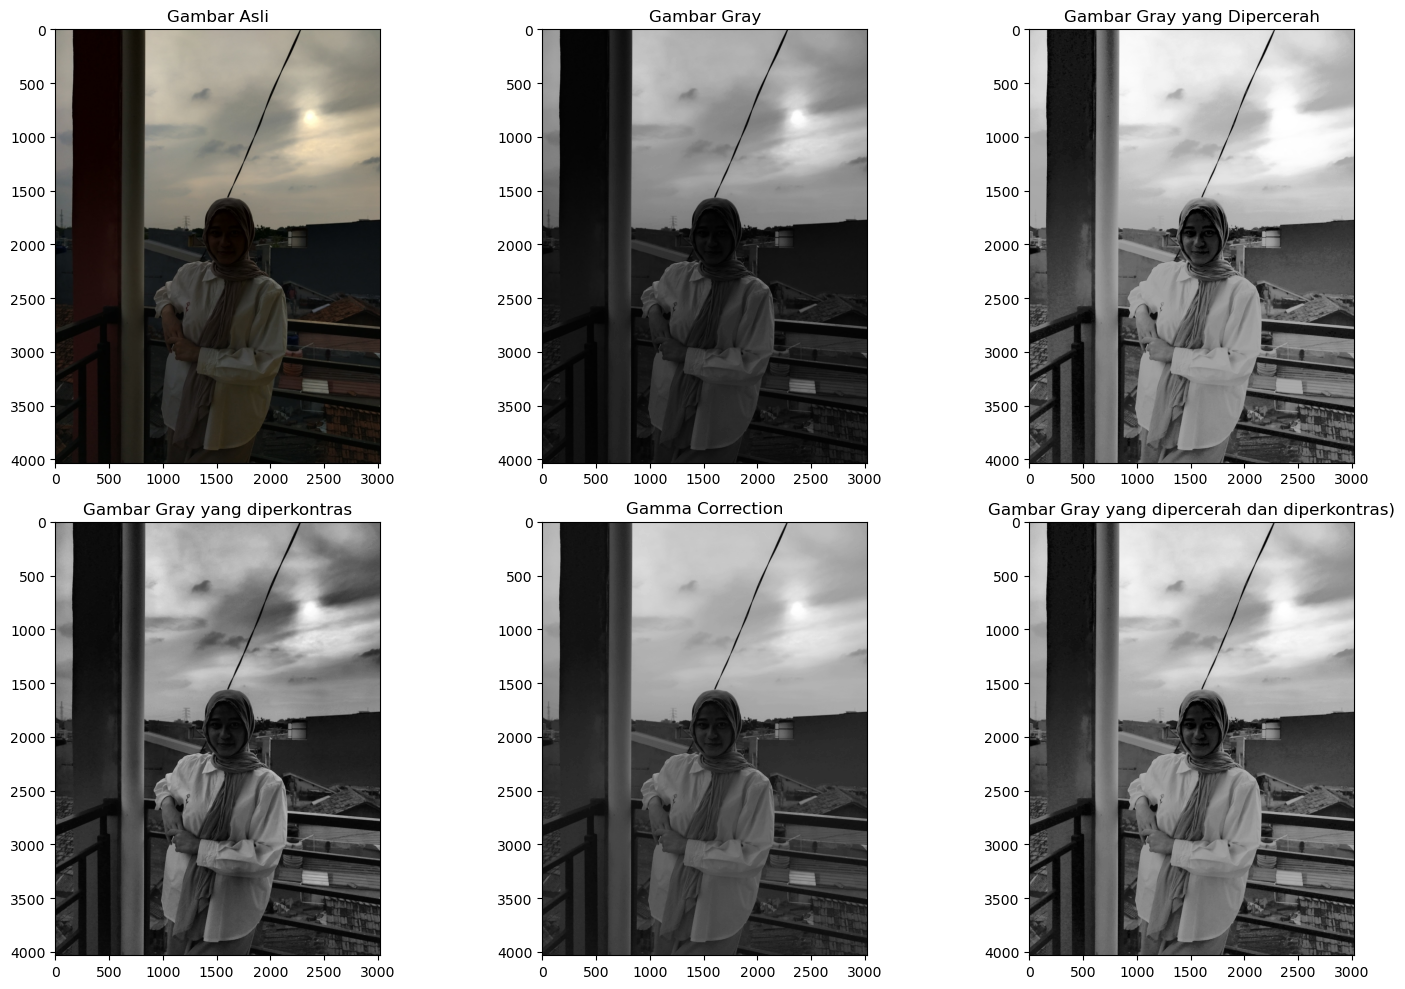

In [15]:
# 202331035_Nadila Kusuma Dewi
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gambar Gray')

plt.subplot(2, 3, 3)
plt.imshow(equ, cmap='gray')
plt.title('Gambar Gray yang Dipercerah')

plt.subplot(2, 3, 4)
plt.imshow(enhanced_clahe, cmap='gray')
plt.title('Gambar Gray yang diperkontras')

plt.subplot(2, 3, 5)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Correction')

plt.subplot(2, 3, 6)
plt.imshow(blended, cmap='gray')
plt.title('Gambar Gray yang dipercerah dan diperkontras)')

plt.tight_layout()
plt.show()

## PERBANDINGAN

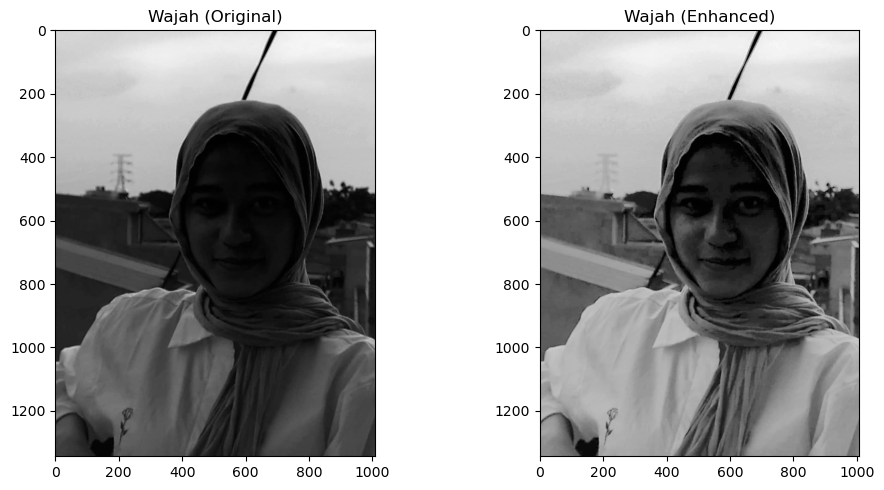

In [17]:
# 202331035_Nadila Kusuma Dewi
# Bandingkan profil wajah antara gambar asli dan hasil perbaikan
# Crop bagian wajah untuk perbandingan detail
def get_face_region(image):
    # Ini adalah contoh sederhana, dalam praktiknya bisa menggunakan face detection
    height, width = image.shape[:2]
    center_x, center_y = width // 2, height // 2
    face_width, face_height = width // 3, height // 3
    left = center_x - face_width // 2
    top = center_y - face_height // 2
    right = center_x + face_width // 2
    bottom = center_y + face_height // 2
    return image[top:bottom, left:right]

face_original = get_face_region(gray)
face_enhanced = get_face_region(blended)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(face_original, cmap='gray')
plt.title('Wajah (Original)')
plt.subplot(1, 2, 2)
plt.imshow(face_enhanced, cmap='gray')
plt.title('Wajah (Enhanced)')
plt.tight_layout()
plt.show()

## Plot histogram sebelum dan sesudah untuk analisis

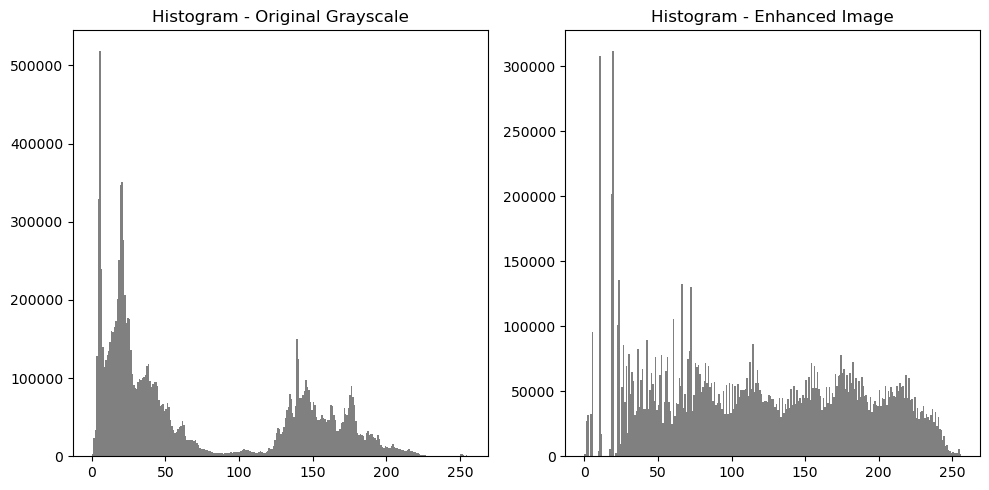

In [22]:
# 202331035_Nadila Kusuma Dewi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), 256, [0, 256], color='gray')
plt.title('Histogram - Original Grayscale')

plt.subplot(1, 2, 2)
plt.hist(blended.ravel(), 256, [0, 256], color='gray')
plt.title('Histogram - Enhanced Image')

plt.tight_layout()
plt.show()